In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Selecting Words from Set of High-Entropy SEMCOR Entries

In [40]:
df = pd.read_csv('../data/randscore_entropy.csv')

In [41]:
df = df[(df['num_senses'] > 2) & (df['Principle Components'] == 2)]

In [42]:
get_pos = lambda l: l.split('.')[1]
df['pos'] = df['Lemma'].apply(get_pos)
df = df[df['pos'].isin(['v', 'n'])]
df = df[['Lemma', 'entropy', 'num_senses', 'freq', 'pos']]

In [43]:
nouns = df[df['pos'] == 'n']
nouns

,Lemma,entropy,num_senses,freq,pos
0,thing.n,2.812869,8,264,n
20,life.n,2.040158,5,217,n
24,time.n,2.002842,5,505,n
28,trouble.n,1.973889,4,61,n
36,line.n,1.912234,5,100,n
44,death.n,1.894325,4,103,n
52,world.n,1.865668,4,202,n
54,force.n,1.861400,4,84,n
60,system.n,1.832076,4,98,n
64,history.n,1.798130,4,99,n


In [44]:
verbs = df[df['pos'] == 'v']
verbs

,Lemma,entropy,num_senses,freq,pos
2,meet.v,2.774648,9,214,v
4,lead.v,2.684982,7,170,v
6,serve.v,2.359147,6,194,v
8,give.v,2.268538,9,704,v
10,raise.v,2.234669,5,111,v
...,...,...,...,...,...
628,pay.v,0.913283,3,190,v
688,believe.v,0.889375,3,215,v
700,help.v,0.877312,3,226,v
768,expect.v,0.816499,3,234,v


In [45]:
verbs['num_senses'].value_counts()

3    67
4    18
5    13
7     3
9     2
6     2
Name: num_senses, dtype: int64

In [46]:
nouns['num_senses'].value_counts()

3    28
4    15
5     4
8     1
Name: num_senses, dtype: int64

In [47]:
nouns[nouns['num_senses'] == 8]

,Lemma,entropy,num_senses,freq,pos
0,thing.n,2.812869,8,264,n


In [48]:
verbs[verbs['num_senses'].isin(np.arange(6, 10))]

,Lemma,entropy,num_senses,freq,pos
2,meet.v,2.774648,9,214,v
4,lead.v,2.684982,7,170,v
6,serve.v,2.359147,6,194,v
8,give.v,2.268538,9,704,v
22,follow.v,2.018523,7,243,v
26,find.v,1.996950,6,663,v
38,make.v,1.903911,7,1401,v


In [36]:
nouns[nouns['num_senses'] != 3].sort_values('entropy', ascending = False)

,Lemma,entropy,num_senses,freq,pos
0,thing.n,2.812869,8,264,n
20,life.n,2.040158,5,217,n
24,time.n,2.002842,5,505,n
28,trouble.n,1.973889,4,61,n
36,line.n,1.912234,5,100,n
44,death.n,1.894325,4,103,n
52,world.n,1.865668,4,202,n
54,force.n,1.861400,4,84,n
60,system.n,1.832076,4,98,n
64,history.n,1.798130,4,99,n


In [59]:
sel_words = ['thing.n', 'lead.v', 'time.n', 'world.n', 'death.n', 'man.n', 'begin.v', 'find.v', 'raise.v', 'drive.v',
    'ask.v', 'indicate.v', 'put.v', 'produce.v', 'consider.v', 'way.n', 'area.n', 'point.n', 'light.n', 'case.n']

In [61]:
df[df['Lemma'].isin(sel_words)].to_csv('../data/expt_semcor_types.csv')

In [55]:
verbs[verbs['num_senses'] == 3].sort_values('freq', ascending = False)

,Lemma,entropy,num_senses,freq,pos
288,ask.v,1.178508,3,408,v
280,look.v,1.207066,3,361,v
624,include.v,0.916274,3,292,v
224,put.v,1.402340,3,257,v
290,live.v,1.158151,3,235,v
206,need.v,1.427800,3,235,v
768,expect.v,0.816499,3,234,v
830,appear.v,0.711120,3,230,v
226,consider.v,1.394831,3,229,v
700,help.v,0.877312,3,226,v


In [56]:
nouns[nouns['num_senses'] == 3].sort_values('freq', ascending = False)

,Lemma,entropy,num_senses,freq,pos
818,way.n,0.728521,3,269,n
302,area.n,1.002968,3,200,n
282,surface.n,1.201350,3,136,n
262,result.n,1.327661,3,131,n
240,value.n,1.360964,3,130,n
278,case.n,1.211936,3,127,n
298,interest.n,1.104984,3,126,n
132,experience.n,1.535854,3,125,n
214,point.n,1.413418,3,118,n
232,field.n,1.391613,3,81,n


(array([ 7.,  8., 21., 57., 22., 23.,  9.,  3.,  0.,  3.]),
 array([0.71112038, 0.92129519, 1.13147   , 1.34164482, 1.55181963,
        1.76199444, 1.97216926, 2.18234407, 2.39251888, 2.6026937 ,
        2.81286851]),
 <a list of 10 Patch objects>)

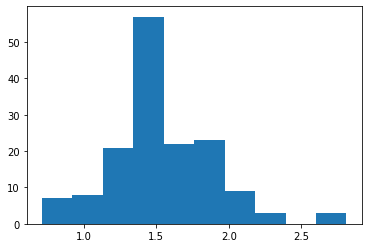

In [30]:
plt.hist(df['entropy'])

## 2. Words showing Polysemous Patterns

In [31]:
tags = pd.read_csv('../data/semcor_tags.csv')

In [32]:
tags

,lemma,word,pos,sense
0,Lemma('group.n.01.group'),group,n,01
1,Lemma('state.v.01.say'),say,v,01
2,Lemma('friday.n.01.Friday'),Friday,n,01
3,Lemma('probe.n.01.investigation'),investigation,n,01
4,Lemma('atlanta.n.01.Atlanta'),Atlanta,n,01
...,...,...,...,...
235074,Lemma('be.v.01.be'),be,v,01
235075,Lemma('let.v.01.let'),let,v,01
235076,Lemma('make.v.01.make'),make,v,01
235077,turn_into.v.00,turn_into,v,00


In [50]:
def find_type_cnts(word, pos):
    df = tags[(tags['word'] == word) & (tags['pos'] == pos)]
    sense_freqs = df.groupby('sense').agg('count')
    return sense_freqs.drop(['word', 'pos'], axis = 1).rename({'lemma':'freq'}, axis = 1)

In [52]:
find_type_cnts('book', 'n')

,freq
sense,
01,47
02,10
05,2


RepCont: book.n, 1 is the contents, 2 is physical object

Prd: newspaper.n, 1 is the newspaper, 2 is the company, only picked this because it was also in RepCont

In [96]:
find_type_cnts('glass', 'n')

,freq
sense,
01,23
02,12
03,4


MatArt: glass.n, 1 is material, 2 is container

In [85]:
find_type_cnts('door', 'n')

,freq
sense,
00,1
01,131
03,4
2;1,1


This looks confusing so we'll call the pipeline

In [89]:
sel = SemCorSelector()
sel.get_word_data('door', 'n')

In [91]:
sel.get_selected_sense_sents(sel.get_senses_for_curr_word())

Senses for word door.n
Number of sentences for sense Synset('door.n.03') 4
Number of sentences for sense Synset('door.n.01') 97
Number of sentences for sense Synset('doorway.n.01') 34


(['The suburban branch is thereby credited with a sale which would have been made even if its glass doors had never opened .',
  'On all sides doors were being slammed in his face .',
  'His broad interest in literary , political , and philosophical movements opened many doors to him .',
  'When words can be used in a more fresh and primitive way so that they strike with the force of sights and sounds , when tones of sound and colors of paint and the carven shape all strike the sensibilities with an undeniable force of data in and of themselves , compelling the observer into an attitude of attention , all this imitates the way experience itself in its deepest character strikes upon the door of consciousness and clamors for entrance .',
  "Russell had reached the house as Cook surmised , dismounted , but just as the old trapper opened the door to receive him , he fell into the trapper 's arms - dead .",
  "When they were refused entrance to his brother 's house nearby , they smashed dow

FigGrd: door.n: 1- "on the door", doorway.n.1- "through the door"

In [128]:
find_type_cnts('school', 'n')

,freq
sense,
01,125
02,12
03,6
04,4
05,1


BldPers- school.n 1. institution, 2. building not sure if this is what we want?

In [135]:
find_type_cnts('begin', 'v')

,freq
sense,
00,31
02,54
03,27
04,1
07,278


In [136]:
find_type_cnts('start', 'v')

,freq
sense,
02,35
03,59
06,11
07,153
08,6
09,4
10,2
11,1
8;3,1


In [137]:
find_type_cnts('finish', 'v')

,freq
sense,
01,52
02,12
04,3


CmpCoer: begin.v, start.v, finish.v unsure about these WN senses

In [146]:
find_type_cnts('face', 'n')

,freq
sense,
00,4
01,117
03,21
04,4
05,1
07,1
5;1,1


In [157]:
find_type_cnts('heart', 'n')

,freq
sense,
01,33
02,23
03,10


BdyObj: heart.n: 1- metaphorical, 2- organ, face.n: 1- body part, 3- appearance

In [177]:
find_type_cnts('table', 'n')

,freq
sense,
01,52
02,25
03,4


In [182]:
find_type_cnts('plane', 'n')

,freq
sense,
01,21
02,16
03,2
